Gender: Gender of the passengers (Female, Male)  
Customer Type: The customer type (Loyal customer, disloyal customer)  
Age: The actual age of the passengers  
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)  
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)  
Flight distance: The flight distance of this journey  
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient  
Ease of Online booking: Satisfaction level of online booking  
Gate location: Satisfaction level of Gate location  
Food and drink: Satisfaction level of Food and drink  
Online boarding: Satisfaction level of online boarding  
Seat comfort: Satisfaction level of Seat comfort  
Inflight entertainment: Satisfaction level of inflight entertainment  
On-board service: Satisfaction level of On-board service  
Leg room service: Satisfaction level of Leg room service  
Baggage handling: Satisfaction level of baggage handling  
Check-in service: Satisfaction level of Check-in service  
Inflight service: Satisfaction level of inflight service  
Cleanliness: Satisfaction level of Cleanliness  
Departure Delay in Minutes: Minutes delayed when departure  
Arrival Delay in Minutes: Minutes delayed when Arrival  
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
airline = pd.read_csv("data/train_airline.csv")

In [3]:
airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [5]:
airline.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

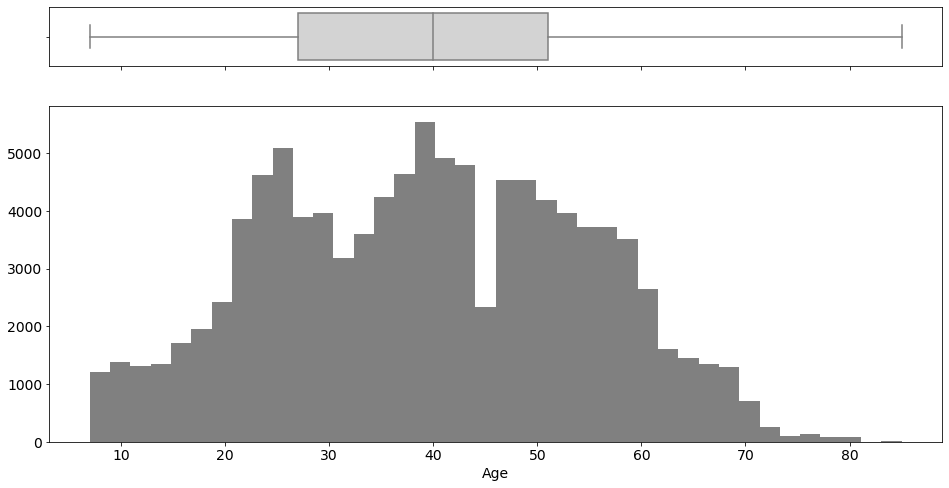

In [69]:
plt.rcParams['font.size'] = 14
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(16, 8))
sns.boxplot(x=airline["Age"],color="lightgray", ax=ax_box)
ax_hist.hist(airline["Age"], bins=40, color="gray")
ax_hist.set(xlabel='Age')
ax_box.set(xlabel='')
plt.show()

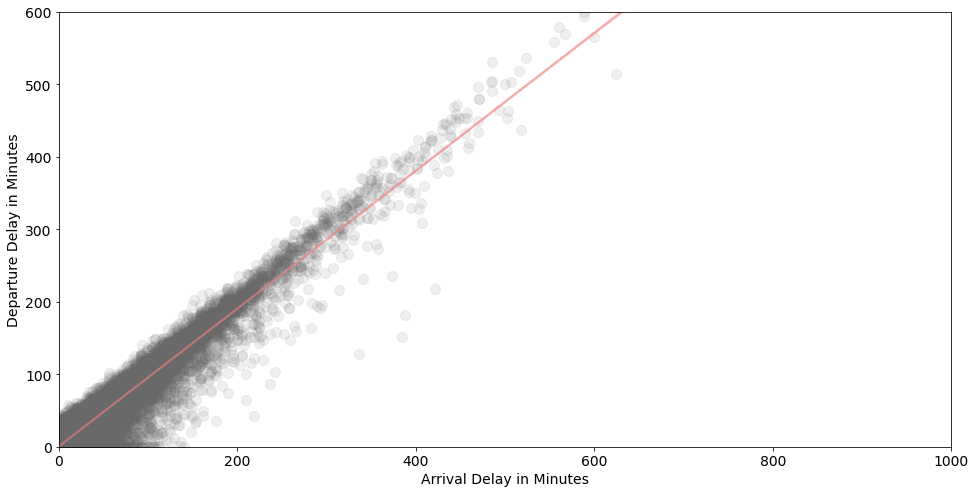

In [126]:
plt.figure(figsize=(16, 8))
sns.regplot(x="Arrival Delay in Minutes", y="Departure Delay in Minutes",data=airline,
            scatter_kws={"s": 100, "color": "dimgray", "alpha":0.1},
            line_kws={"color" : "lightcoral", "alpha":0.6})
plt.xlim(0, 1000)
plt.ylim(0, 600)
plt.show()

In [75]:
airline.groupby("satisfaction").agg({"Arrival Delay in Minutes" : np.mean, "Age" : np.mean})

,Arrival Delay in Minutes,Age
satisfaction,,
neutral or dissatisfied,17.127536,37.566688
satisfied,12.630799,41.750583


In [78]:
airline.groupby("Customer Type").agg({"satisfaction" : "count", "Age" : np.mean})

,satisfaction,Age
Customer Type,,
Loyal Customer,84923,41.392497
disloyal Customer,18981,30.374269


In [80]:
pd.crosstab(airline["satisfaction"], airline["Customer Type"])

Customer Type,Loyal Customer,disloyal Customer
satisfaction,,
neutral or dissatisfied,44390,14489
satisfied,40533,4492
